# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# Import data
c4_epa_air_quality = pd.read_csv("c4_epa_air_quality.csv")


## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [4]:
# Code Here 
mean = c4_epa_air_quality['aqi'].mean()
mean

np.float64(6.757692307692308)

In [5]:
# Code Here
std = c4_epa_air_quality['aqi'].std()
std

np.float64(7.061706678820724)

In [6]:
# Code Here
median = c4_epa_air_quality['aqi'].median()
median

np.float64(5.0)

**Question:** What time range does this data cover?

A: Jan 1st, 2018

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [9]:
# Code Here
min = c4_epa_air_quality['aqi'].min()
max = c4_epa_air_quality['aqi'].max()
print(min)
print(max)



0
50


**Question:** Are all states equally represented in the dataset?

In [ ]:
# Code Here 

In [ ]:
# Code Here

A: No, each state's occurance differs from each other

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [10]:
# Summarize the mean AQI for RRE states.
file_path = "c4_epa_air_quality.csv"  
df = pd.read_csv(file_path)
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]
rre_data = df[df["state_name"].isin(rre_states)]
mean_aqi_by_state = rre_data.groupby("state_name")["aqi"].mean()
print(mean_aqi_by_state)


# Create a list of RRE states.


# Subset `aqi` to only consider these states.


# Find the mean aqi for each of the RRE states.
 #alias as aqi_rre

state_name
California      12.121212
Florida          5.500000
Michigan         8.111111
Ohio             3.333333
Pennsylvania     2.900000
Texas            2.700000
Name: aqi, dtype: float64


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

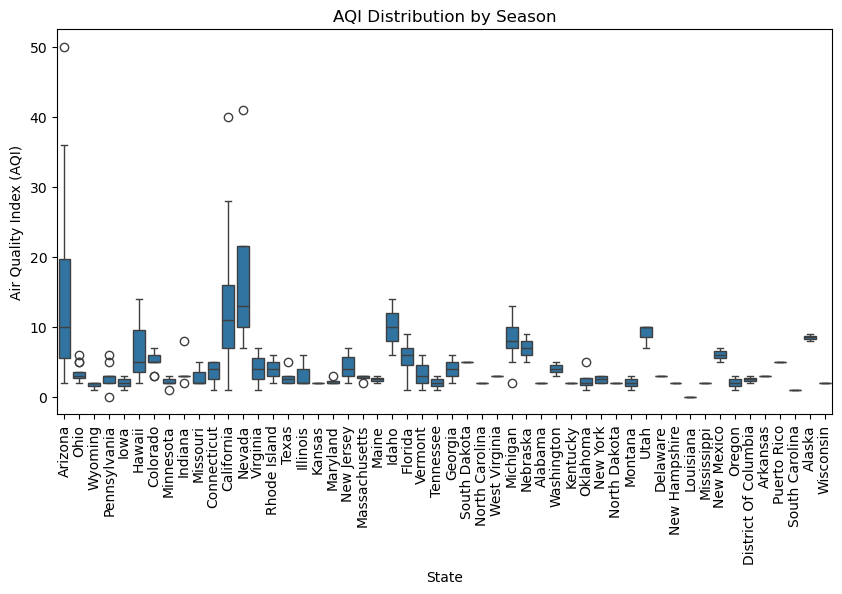

In [17]:
# Import seaborn as sns.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="state_name", y="aqi", data=df)
plt.title("AQI Distribution by Season")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Air Quality Index (AQI)")
plt.show()

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

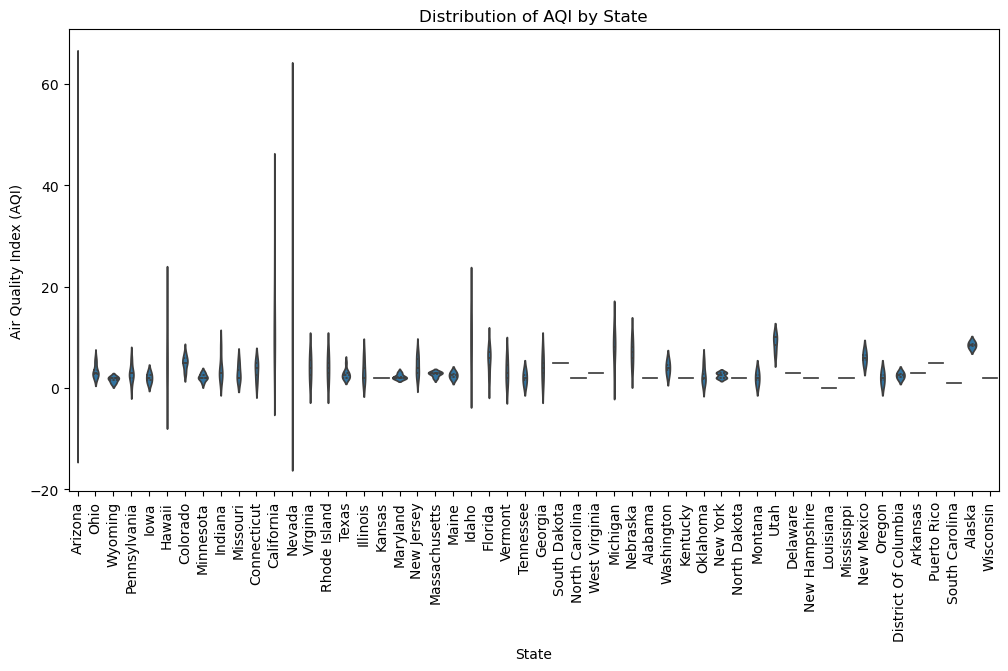

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.violinplot(x="state_name", y="aqi", data=df, inner="quartile")
plt.xticks(rotation=90)
plt.title("Distribution of AQI by State")
plt.xlabel("State")
plt.ylabel("Air Quality Index (AQI)")
plt.show()


**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A: Arizona and Nevada

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [19]:
# Find the mean aqi for CA state.
file_path = "c4_epa_air_quality.csv"  
df = pd.read_csv(file_path)
mean_aqi_ca = df[df["state_name"] == "California"]["aqi"].mean()
print(f"Mean AQI for California: {mean_aqi_ca}")

Mean AQI for California: 12.121212121212121


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [ ]:
# Input your confidence level here: 95%

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [22]:
# Calculate your margin of error.
file_path = "c4_epa_air_quality.csv"
df = pd.read_csv(file_path)
ca_aqi = df[df["state_name"] == "California"]["aqi"]

std_dev_ca = ca_aqi.std(ddof=1)  # Sample standard deviation
sample_size_ca = len(ca_aqi)

# Set Z-score for 95% confidence level

z_value = 1.96

# Next, calculate your standard error.
margin_of_error = z_value * (std_dev_ca / np.sqrt(sample_size_ca))


# Lastly, use the preceding result to calculate your margin of error.
print(f"Margin of Error: {margin_of_error}")



Margin of Error: 1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [21]:
# Calculate your confidence interval (upper and lower limits).
print(f"Confidence Interval: ({mean_aqi_ca - margin_of_error}, {mean_aqi_ca + margin_of_error})")


Confidence Interval: (10.359719031551148, 13.882705210873095)


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [ ]:
# Import stats from scipy.
#already done in the beginning

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [23]:
# Code Here
file_path = "c4_epa_air_quality.csv"
df = pd.read_csv(file_path)
ca_aqi = df[df["state_name"] == "California"]["aqi"]
sample_mean = ca_aqi.mean()
std_dev = ca_aqi.std(ddof=1)  
sample_size = len(ca_aqi)
confidence_level = 0.99  
standard_error = std_dev / np.sqrt(sample_size)
confidence_interval = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)
print(f"Chosen Confidence Level: {confidence_level*100}%")
print(f"Sample Mean: {sample_mean}")
print(f"Standard Error: {standard_error}")
print(f"Confidence Interval: {confidence_interval}")

Chosen Confidence Level: 99.0%
Sample Mean: 12.121212121212121
Standard Error: 0.8987209641127412
Confidence Interval: (np.float64(9.806260326136803), np.float64(14.43616391628744))


# Considerations

**What are some key takeaways that you learned from this project?**

A: to calculate confident intervals

**What findings would you share with others?**

A:the df function is used very often

**What would you convey to external readers?**

A:99 percent chance that california index is between 9.8 and 14.4

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 